The project was sincerely completed only by Suhana(999%)..


NOTICE: She also doesn't know anything about me(Chatheriyan)😂

In [130]:
pip install imutils


[notice] A new release of pip is available: 23.1.2 -> 23.2.1
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [131]:
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
import os
import random
import cv2
import imutils
import random
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
# from keras.utils import np_utils
from keras.utils import to_categorical
from keras.models import Sequential
from keras import optimizers
from sklearn.preprocessing import LabelBinarizer
from keras import backend as K
from keras.layers import Dense, Activation, Flatten, Dense,MaxPooling2D, Dropout
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

In [132]:
import os
import cv2

dir = "/Users/guru/Documents/HTR/Train"
train_data = []
img_size = 32
non_chars = ["#", "$", "&", "@"]

for i in os.listdir(dir):
    sub_directory = os.path.join(dir, i)
    
    if i in non_chars or not os.path.isdir(sub_directory):
        continue
    
    count = 0
    for j in os.listdir(sub_directory):
        count += 1
        if count > 4000:
            break
        img = cv2.imread(os.path.join(sub_directory, j), 0)
        img = cv2.resize(img, (img_size, img_size))
        train_data.append([img, i])

In [133]:
len(train_data)

140000

In [135]:
val_dir = "Validation/"
val_data = []
img_size = 32

for i in os.listdir(val_dir):
    sub_directory = os.path.join(val_dir, i)
    
    if i in non_chars or not os.path.isdir(sub_directory):
        continue
    
    count = 0
    for j in os.listdir(sub_directory):
        count += 1
        if count > 1000:
            break
        img = cv2.imread(os.path.join(sub_directory, j), 0)
        img = cv2.resize(img, (img_size, img_size))
        val_data.append([img, i])

In [134]:
len(val_data)

15209

In [136]:
random.shuffle(train_data)
random.shuffle(val_data)

In [137]:
train_X = []
train_Y = []
for features,label in train_data:
    train_X.append(features)
    train_Y.append(label)

In [138]:
val_X = []
val_Y = []
for features,label in val_data:
    val_X.append(features)
    val_Y.append(label)

In [139]:
LB = LabelBinarizer()
train_Y = LB.fit_transform(train_Y)
val_Y = LB.fit_transform(val_Y)

In [141]:
train_X = np.array(train_X)/255.0
train_X = train_X.reshape(-1,32,32,1)
train_Y = np.array(train_Y)

In [140]:
val_X = np.array(val_X)/255.0
val_X = val_X.reshape(-1,32,32,1)
val_Y = np.array(val_Y)

In [142]:
print(train_X.shape,val_X.shape)

(140000, 32, 32, 1) (15209, 32, 32, 1)


In [143]:
print(train_Y.shape,val_Y.shape)

(140000, 35) (15209, 35)


In [144]:
model = Sequential()

model.add(Conv2D(32, (3, 3), padding = "same", activation='relu', input_shape=(32,32,1)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(35, activation='softmax'))

In [145]:
model.summary()

Model: "sequential_4"
_________________________________________________________________


 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 7, 7, 64)          0         
 ng2D)                                                           
                                                                 
 conv2d_14 (Conv2D)          (None, 5, 5, 128)         73856     
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 2, 2, 128)         0         
 ng2D)                                                           
          

In [146]:
model.compile(loss='categorical_crossentropy', optimizer="adam",metrics=['accuracy'])

In [147]:
history = model.fit(train_X,train_Y, epochs=10, batch_size=64, validation_data = (val_X, val_Y),  verbose=1)

Epoch 1/10
2188/2188 [==============================] - 46s 21ms/step - loss: 0.6787 - accuracy: 0.7869 - val_loss: 0.3271 - val_accuracy: 0.8923
Epoch 2/10
2188/2188 [==============================] - 49s 22ms/step - loss: 0.3604 - accuracy: 0.8795 - val_loss: 0.3322 - val_accuracy: 0.8792
Epoch 3/10
2188/2188 [==============================] - 52s 24ms/step - loss: 0.3133 - accuracy: 0.8939 - val_loss: 0.2769 - val_accuracy: 0.9089
Epoch 4/10
2188/2188 [==============================] - 56s 26ms/step - loss: 0.2868 - accuracy: 0.9022 - val_loss: 0.2950 - val_accuracy: 0.8931
Epoch 5/10
2188/2188 [==============================] - 53s 24ms/step - loss: 0.2677 - accuracy: 0.9075 - val_loss: 0.2371 - val_accuracy: 0.9177
Epoch 6/10
2188/2188 [==============================] - 52s 24ms/step - loss: 0.2533 - accuracy: 0.9119 - val_loss: 0.2693 - val_accuracy: 0.9064
Epoch 7/10
2188/2188 [==============================] - 55s 25ms/step - loss: 0.2427 - accuracy: 0.9142 - val_loss: 0.2635 -

{'loss': [0.6786723732948303, 0.3604393005371094, 0.3133324086666107, 0.2867538332939148, 0.26771867275238037, 0.25332698225975037, 0.24273459613323212, 0.23033946752548218, 0.2240877002477646, 0.21874414384365082], 'accuracy': [0.7869071364402771, 0.8794571161270142, 0.8938500285148621, 0.9021857380867004, 0.9074857234954834, 0.9119428396224976, 0.9141928553581238, 0.9184785485267639, 0.9200571179389954, 0.9220643043518066], 'val_loss': [0.327067494392395, 0.33218368887901306, 0.27693647146224976, 0.29497554898262024, 0.2370508462190628, 0.2692607343196869, 0.2635337710380554, 0.27332648634910583, 0.21919645369052887, 0.24809420108795166], 'val_accuracy': [0.8923006057739258, 0.8792162537574768, 0.908869743347168, 0.8930895924568176, 0.9177460670471191, 0.9063712358474731, 0.9056479930877686, 0.8972318768501282, 0.9277401566505432, 0.908606767654419]}


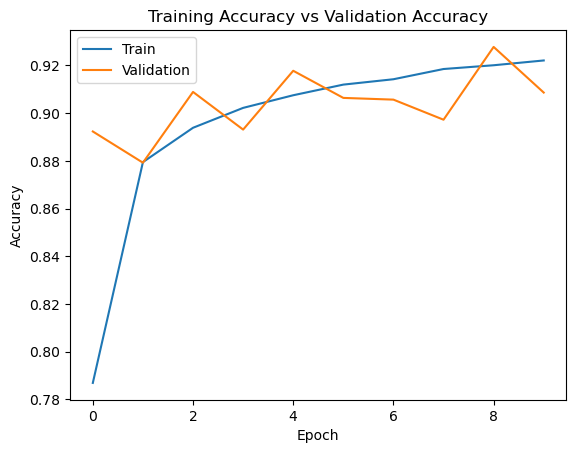

In [148]:
print(history.history)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Training Accuracy vs Validation Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

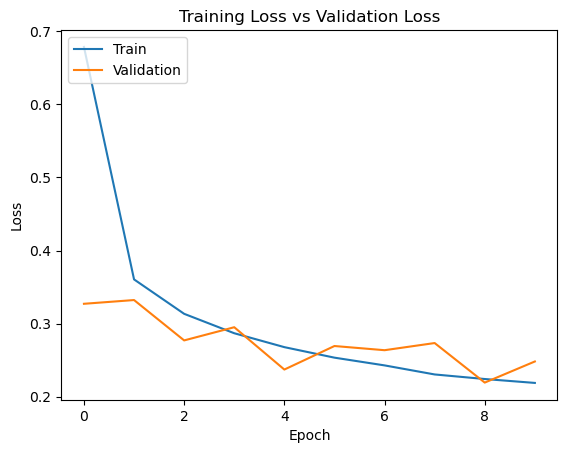

In [149]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss vs Validation Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [150]:
def sort_contours(cnts, method="left-to-right"):
    reverse = False
    i = 0
    if method == "right-to-left" or method == "bottom-to-top":
        reverse = True
    if method == "top-to-bottom" or method == "bottom-to-top":
        i = 1
    boundingBoxes = [cv2.boundingRect(c) for c in cnts]
    (cnts, boundingBoxes) = zip(*sorted(zip(cnts, boundingBoxes),
    key=lambda b:b[1][i], reverse=reverse))

    return (cnts, boundingBoxes)

In [151]:
def get_letters(img):
    letters = []
    total_bbox_cordi = []
    image = cv2.imread(img)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    ret,thresh1 = cv2.threshold(gray ,127,255,cv2.THRESH_BINARY_INV)
    dilated = cv2.dilate(thresh1, None, iterations=2)

    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL,cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sort_contours(cnts, method="left-to-right")[0]

    for c in cnts:
        if cv2.contourArea(c) > 10:
            (x, y, w, h) = cv2.boundingRect(c)
            print([x,y,w,h])
            single_bbox_cordi = [x,y,w,h]
            total_bbox_cordi.append(single_bbox_cordi)
            cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        roi = gray[y:y + h, x:x + w]
        thresh = cv2.threshold(roi, 0, 255,cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)[1]
        thresh = cv2.resize(thresh, (32, 32), interpolation = cv2.INTER_CUBIC)
        thresh = thresh.astype("float32") / 255.0
        thresh = np.expand_dims(thresh, axis=-1)
        thresh = thresh.reshape(1,32,32,1)
        ypred = model.predict(thresh)
        ypred = LB.inverse_transform(ypred)
        [x] = ypred
        letters.append(x)
    return letters, image, total_bbox_cordi

In [152]:
def get_word(letter):
    word = "".join(letter)
    return word

[10, 15, 14, 17]
1/1 [==============================] - 0s 47ms/step
[26, 16, 10, 16]
1/1 [==============================] - 0s 9ms/step
[44, 15, 11, 17]
1/1 [==============================] - 0s 8ms/step
[62, 19, 11, 13]
1/1 [==============================] - 0s 8ms/step
[82, 15, 12, 18]
1/1 [==============================] - 0s 8ms/step
BENFS
[[10, 15, 14, 17], [26, 16, 10, 16], [44, 15, 11, 17], [62, 19, 11, 13], [82, 15, 12, 18]]


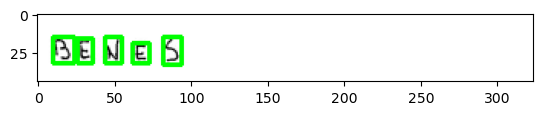

In [153]:
letter,image, total_bbox_cordi = get_letters("/Users/guru/Documents/HTR/TRAIN_00003.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[19, 11, 11, 13]
1/1 [==============================] - 0s 11ms/step
[30, 10, 12, 14]
1/1 [==============================] - 0s 10ms/step
[49, 11, 13, 14]
1/1 [==============================] - 0s 9ms/step
[65, 10, 15, 14]
1/1 [==============================] - 0s 11ms/step
[81, 9, 12, 16]
1/1 [==============================] - 0s 9ms/step
LIL0U
[[19, 11, 11, 13], [30, 10, 12, 14], [49, 11, 13, 14], [65, 10, 15, 14], [81, 9, 12, 16]]


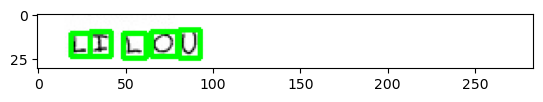

In [154]:
letter,image,total_bbox_cordi = get_letters("train_v2/train/TRAIN_00023.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[20, 8, 8, 14]
1/1 [==============================] - 0s 11ms/step
[35, 8, 10, 13]
1/1 [==============================] - 0s 14ms/step
[51, 9, 10, 16]
1/1 [==============================] - 0s 9ms/step
[66, 5, 12, 18]
1/1 [==============================] - 0s 8ms/step
[82, 8, 10, 18]
1/1 [==============================] - 0s 9ms/step
[97, 9, 12, 16]
1/1 [==============================] - 0s 9ms/step
[112, 10, 12, 17]
1/1 [==============================] - 0s 8ms/step
3AFFEUX
[[20, 8, 8, 14], [35, 8, 10, 13], [51, 9, 10, 16], [66, 5, 12, 18], [82, 8, 10, 18], [97, 9, 12, 16], [112, 10, 12, 17]]


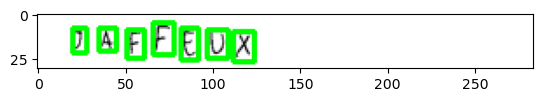

In [155]:
letter,image, total_bbox_cordi = get_letters("train_v2/train/TRAIN_00030.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[18, 8, 13, 19]


1/1 [==============================] - 0s 14ms/step
[33, 9, 12, 18]
1/1 [==============================] - 0s 11ms/step
[50, 8, 14, 18]
1/1 [==============================] - 0s 8ms/step
[65, 7, 15, 18]
1/1 [==============================] - 0s 9ms/step
RUPP
[[18, 8, 13, 19], [33, 9, 12, 18], [50, 8, 14, 18], [65, 7, 15, 18]]


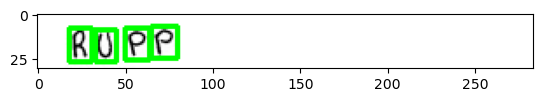

In [156]:
letter,image,total_bbox_cordi = get_letters("validation_v2/validation/VALIDATION_0005.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

[9, 15, 14, 16]
1/1 [==============================] - 0s 12ms/step
[28, 12, 13, 18]
1/1 [==============================] - 0s 8ms/step
[48, 13, 11, 17]
1/1 [==============================] - 0s 7ms/step
[65, 12, 13, 18]
1/1 [==============================] - 0s 7ms/step
[80, 13, 16, 16]
1/1 [==============================] - 0s 7ms/step
[99, 14, 13, 15]
1/1 [==============================] - 0s 7ms/step
[113, 14, 15, 17]
1/1 [==============================] - 0s 7ms/step
[135, 14, 13, 16]
1/1 [==============================] - 0s 7ms/step
[151, 13, 13, 17]
1/1 [==============================] - 0s 7ms/step
YALENTJNF
[[9, 15, 14, 16], [28, 12, 13, 18], [48, 13, 11, 17], [65, 12, 13, 18], [80, 13, 16, 16], [99, 14, 13, 15], [113, 14, 15, 17], [135, 14, 13, 16], [151, 13, 13, 17]]


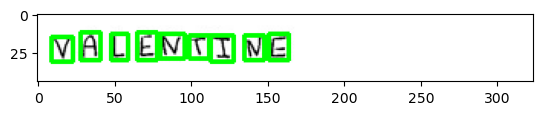

In [157]:
letter,image, total_bbox_cordi = get_letters("test_v2/test/TEST_0007.jpg")
word = get_word(letter)
print(word)
print(total_bbox_cordi)
plt.imshow(image)

In [158]:
letter

['Y', 'A', 'L', 'E', 'N', 'T', 'J', 'N', 'F']

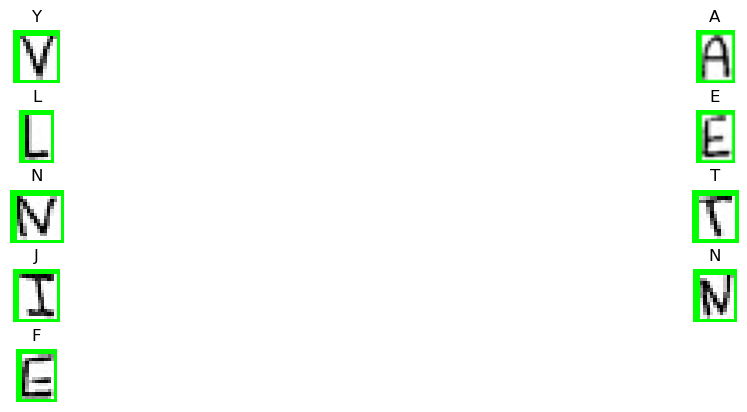

In [159]:
plt.figure(figsize=(15, 10))
for i in range(0,len(total_bbox_cordi)):
    ax = plt.subplot(10, 2, i+1)
    t =total_bbox_cordi[i]
    x_min = t[0]
    y_min = t[1]
    w_min = t[2]
    h_min= t[3]
    cropped_image = image[y_min:y_min+h_min, x_min:x_min+w_min]
    plt.title(letter[i], fontsize=12)
    plt.imshow(cropped_image)
    plt.axis('off')
plt.subplots_adjust(wspace=0.4, hspace=0.5)

In [160]:
!mkdir -p saved_model
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets
